In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [48]:
titanic=pd.read_csv("C:/Users/Supriya Jain/Downloads/train (1)/train.csv")

In [89]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Values

<AxesSubplot:>

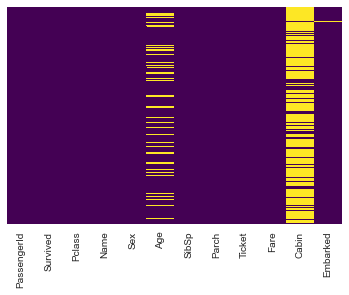

In [88]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

# Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

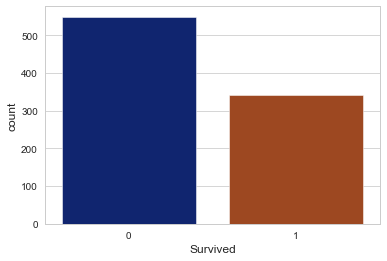

In [105]:
sns.countplot(x='Survived',data=titanic,palette='dark')


In [94]:
titanic.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


<AxesSubplot:xlabel='Survived', ylabel='count'>

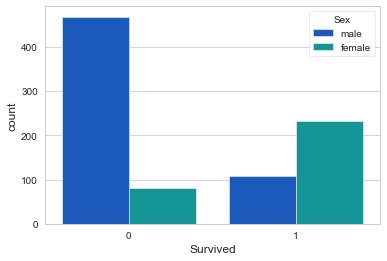

In [107]:
sns.countplot(x='Survived',data=titanic,hue='Sex',palette='winter')

<AxesSubplot:xlabel='Survived', ylabel='count'>

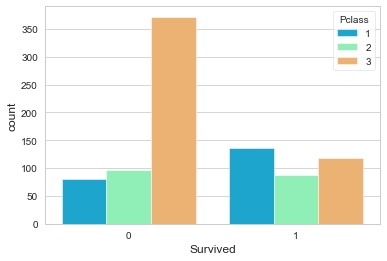

In [111]:
sns.countplot(x='Survived',data=titanic,hue='Pclass',palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

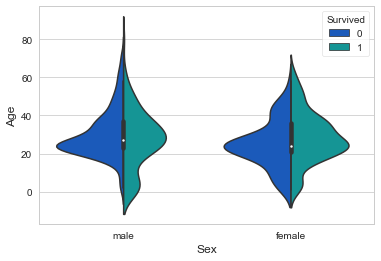

In [173]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = titanic, split = True,palette='winter')

___
# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Age'>

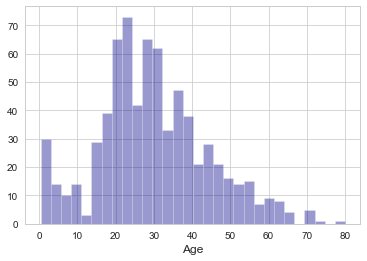

In [117]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkblue',bins=30)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

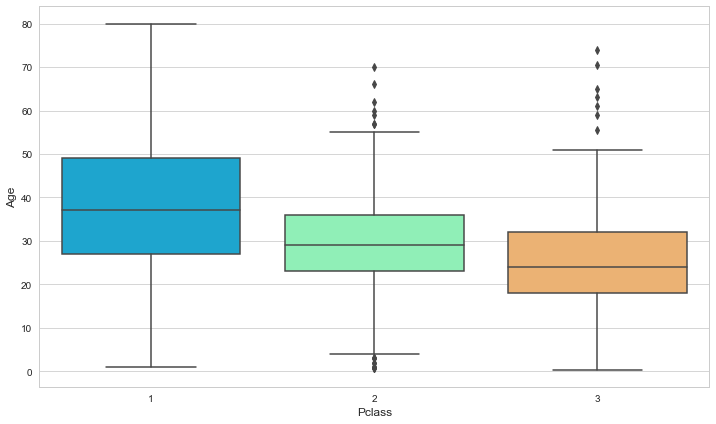

In [124]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y=('Age'),data=titanic,palette='rainbow')


As we see there are outliers in age are from Class-2 & Class-3.

C:\Users\Supriya Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

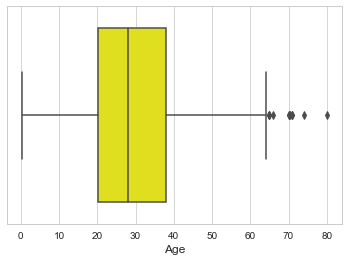

In [130]:
sns.boxplot('Age',data=titanic,color="yellow")

In [136]:
titanic.groupby(['Pclass']).mean('Age')

,PassengerId,Survived,Age,SibSp,Parch,Fare,new age
Pclass,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,38.233441
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,29.355491
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,22.823718


In [142]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [143]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

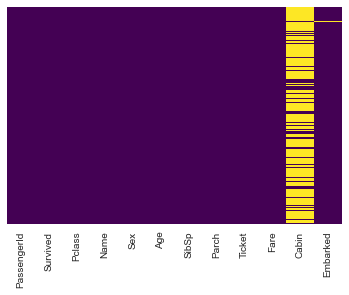

In [149]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [151]:
titanic.drop('Cabin',axis=1,inplace=True)

In [152]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [154]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# Fare

<AxesSubplot:>

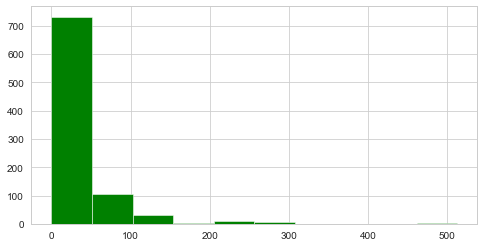

In [163]:
titanic['Fare'].hist(color='green',bins=10,figsize=(8,4))

<AxesSubplot:xlabel='Fare', ylabel='Count'>

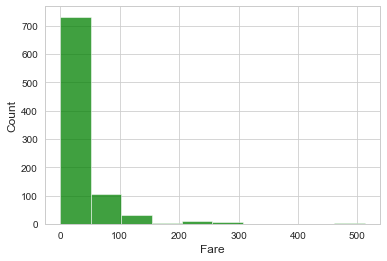

In [167]:
sns.histplot(titanic['Fare'],kde=False,color='green',bins=10)

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

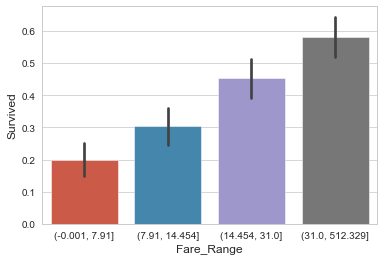

In [174]:
# Divide Fare into 4 bins
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)
  
# Barplot - Shows approximate values based 
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', 
data = titanic)

C:\Users\Supriya Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatterplot of passengers (Fare and Age)')

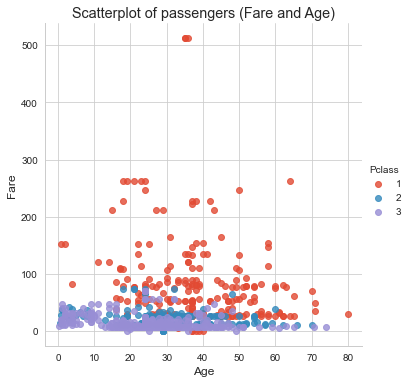

In [212]:
sns.lmplot('Age', 'Fare', data=titanic, fit_reg=False, hue="Pclass")
plt.title('Scatterplot of passengers (Fare and Age)')

# boarding

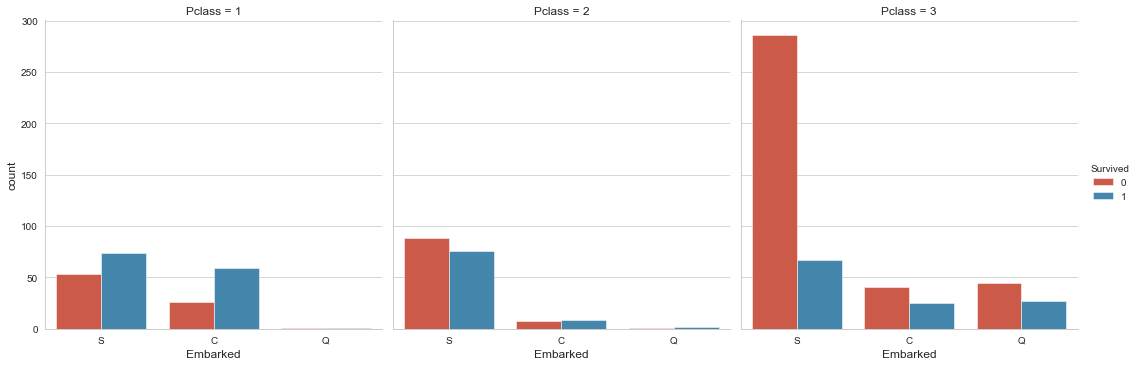

In [175]:
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = titanic)

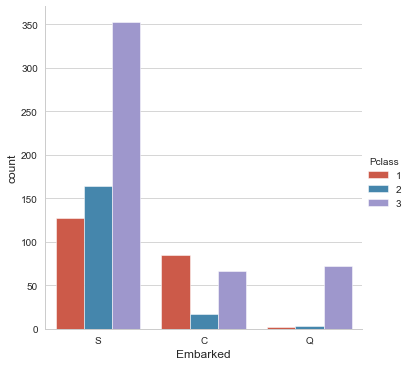

In [202]:
sns.catplot('Embarked', data=titanic, kind='count',hue='Pclass', row_order=['C','Q','S']);

There are More than 70% of the people boarded from S(Southampton).

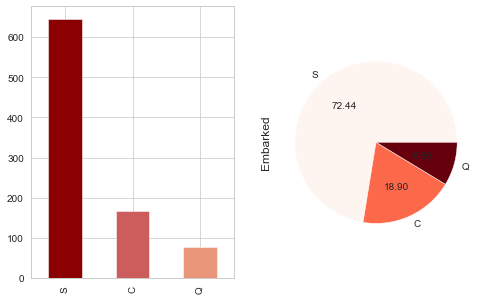

In [210]:
fig,axes = plt.subplots(1,2,figsize=(8,5))
titanic["Embarked"].value_counts().plot(kind="bar", ax=axes[0],color =['DarkRed','indianred','darksalmon'])
titanic["Embarked"].value_counts().plot(kind="pie",ax=axes[1],autopct='%0.2f', colormap="Reds")
plt.show()

In [177]:
pclass_count = titanic.groupby('Pclass')['Pclass'].count()

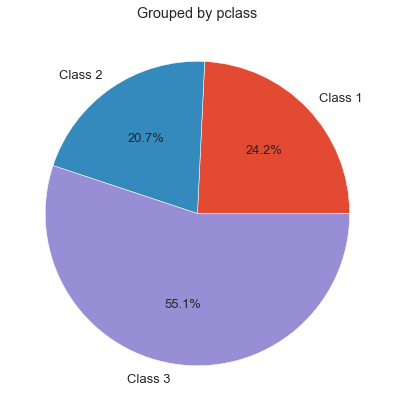

In [182]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'],
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()